<a href="https://colab.research.google.com/github/abhishekhnmr/Data-Analysis-projects/blob/main/Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Global Terrorism Dataset



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Abhishek Hingmire**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Global Terrorism Database is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The Global Terrorism Database includes systematic data on domestic as well as international terrorist incidents that have occurred during 1970-2017 and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. The objective is to Explore and analyze the data to discover key findings pertaining to terrorist activities.

#### **Define Your Business Objective?**

To Explore and Analyze the Global Terrorism dataset to discover key findings pertaining to terrorist activities.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px

### Dataset Loading

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset

path = '/content/drive/MyDrive/Global Terrorism Data.csv'
df = pd.read_csv(path, encoding_errors = 'ignore')  # Got an UTF-8 encoding error while reading the csv file. To solve that, tried to use different encoding but still didn't work. That's why here encoding_error = 'ignore' parameter is being used here.

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Total Rows in dataset: {df.shape[0]}")
print(f"Total Columns in dataset: {df.shape[1]}")

Total Rows in dataset: 181691
Total Columns in dataset: 135


### Dataset Information

In [8]:
# Dataset Info

df.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181256 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

print(f"Number of duplicate rows in dataset: {df.duplicated().sum()}")

Number of duplicate rows in dataset: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

print(f"Total Null values in dataset: {df.isna().sum().sum()}\n")

print("Columns which have null values are:")
dfna = df.isna().sum()
print(dfna[dfna != 0])

Total Null values in dataset: 13854004

Columns which have null values are:
approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


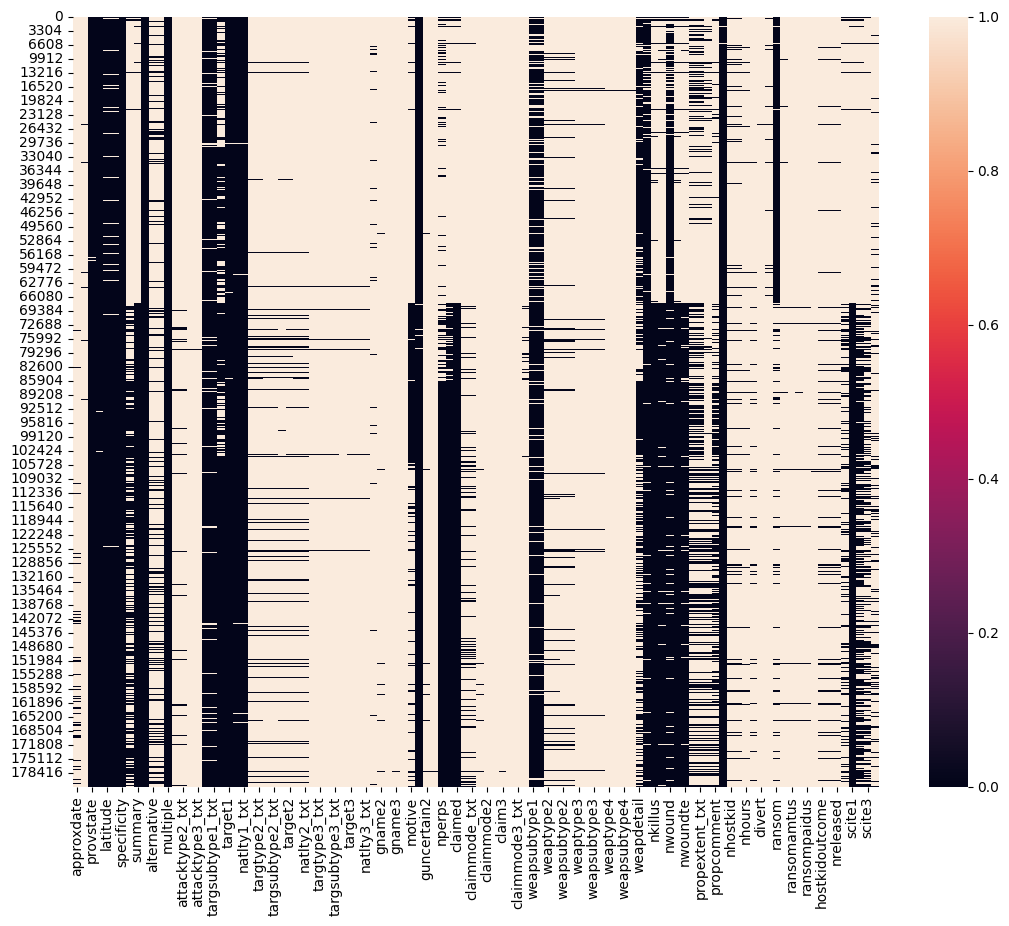

In [11]:
# Visualizing the missing values

# To visualize null value counts, heatmap is being used here because it can help to identify patterns and clusters of missing data.

plt.figure(figsize=(13,10))
sns.heatmap(df[dfna[dfna!=0].index].isna())
plt.show()

### What did you know about your dataset?

*  The data has 181691 rows and 135 columns.
*  There are no Duplicate values in the dataset.
*  Eventid column is the primary key.
*  There are 106 columns which have null values in them.
*  Around 88 columns amoung them have null values more than 15%.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

### Variables Description

* **eventid** - Incidents from the Global Terrorism Data follow a 12-digit Event ID system.

* **iyear** - This field contains the year in which the incident occurred. In the case of incident(s) occurring
over an extended period, the field will record the year when the incident was initiated.

* **imonth** - This field contains the number of the month in which the incident occurred. In the case of
incident(s) occurring over an extended period, the field will record the month when the
incident was initiated.

* **iday** - This field contains the numeric day of the month on which the incident occurred. In the case of
incident(s) occurring over an extended period, the field will record the day when the incident
was initiated.

* **approxdate** - Whenever the exact date of the incident is not known or remains unclear, this field is used to
record the approximate date of the incident. "0" is used in the place of day.

* **extended** -1 = "Yes" = The duration of an incident extended more than 24 hours. 0 = "No" = The duration of an incident extended less than 24 hours.

* **resolution** - This field only applies if “Extended Incident?” is “Yes” and records the date in which the
incident was resolved (hostages released by perpetrators; hostages killed; successful rescue,
etc.)

* **country** - (country code) This field identifies the country or location where the incident occurred. Separatist regions, such
as Kashmir, Chechnya, South Ossetia, Transnistria, or Republic of Cabinda, are coded as part of
the “home” country.

* **country_txt** - This field identifies the country or location where the incident occurred. Separatist regions, such
as Kashmir, Chechnya, South Ossetia, Transnistria, or Republic of Cabinda, are coded as part of
the “home” country.

* **region** - This field identifies the region in which the incident occurred. The regions are divided into the
following 12 categories, and dependent on the country coded for the case.

* **region_txt** - This field identifies the region in which the incident occurred. The regions are divided into the
following 12 categories, and dependent on the country coded for the case.

* **provstate** - This variable records the name (at the time of event) of the 1st order subnational administrative
region in which the event occurs.

* **city** -
This field contains the name of the city, village, or town in which the incident occurred. If the
city, village, or town for an incident is unknown, then this field contains the smallest
administrative area below provstate which can be found for the incident (e.g., district).

* **latitude** - This field records the latitude (based on WGS1984 standards) of the city in which the event
occurred.

* **longitude** - This field records the longitude (based on WGS1984 standards) of the city in which the event
occurred.

* **specificity** - This field identifies the geospatial resolution of the latitude and longitude fields. The most
specific resolution uniformly available throughout the dataset is the center of the city, village,
or town in which the attack occurred. Coordinates with greater resolution, while possible, are
not systematically included in the database.

 1 = event occurred in city/village/town and lat/long is for that location

 2 = event occurred in city/village/town and no lat/long could be found, so coordinates are
for centroid of smallest subnational administrative region identified

 3 = event did not occur in city/village/town, so coordinates are for centroid of smallest
subnational administrative region identified

 4 = no 2nd order or smaller region could be identified, so coordinates are for center of 1st
order administrative region

 5 = no 1st order administrative region could be identified for the location of the attack, so
latitude and longitude are unknown

* **vicinity** - 1 = "Yes" The incident occurred in the immediate vicinity of the city in question. 0 = "No" The incident in the city itself.

* **location** - This field is used to specify additional information about the location of the incident.

* **summary** - A brief narrative summary of the incident, noting the “when, where, who, what, how, and
why.”

* **crit1** - The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

* **crit2** - To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims. Such evidence can include (but is not limited to) the following: pre- or postattack statements by the perpetrator(s), past behavior by the perpetrators, or the
particular nature of the target/victim, weapon, or attack type.

* **crit3** - The action is outside the context of legitimate warfare activities, insofar as it targets
non-combatants (i.e. the act must be outside the parameters permitted by international
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of
12 August 1949 and elsewhere).

* **doubtterr** - In certain cases there may be some uncertainty whether an incident meets all of the criteria for
inclusion. In these ambiguous cases, where there is a strong possibility, but not certainty, that
an incident represents an act of terrorism, the incident is included in GTD and is coded as “Yes”
for this variable.

* **alternative / alternative_txt** - This variable applies to only those cases coded as “Yes” for “Doubt Terrorism Proper?” (above).
This variable identifies the most likely categorization of the incident other than terrorism.

 1= Insurgency/Guerilla Action

 2= Other Crime Type

 3= Inter/Intra-Group Conflict

 4= Lack of Intentionality

 5= State Actors (systematically coded post-2012)

* **multiple** - In those cases where several attacks are connected, but where the various actions do not
constitute a single incident (either the time of occurrence of incidents or their locations are
discontinuous – see Single Incident Determination section above), then “Yes” is selected to
denote that the particular attack was part of a “multiple” incident.

* **related** - When an attack is part of a coordinated, multi-part incident the GTD IDs of the related incidents
are listed here, separated by commas.

* **success** - Success of a terrorist strike is defined according to the tangible effects of the attack. Success is
not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded
in a building would be counted as a success even if it did not succeed in bringing the building
down or inducing government repression.

 The definition of a successful attack depends on the type of attack. Essentially, the key question
 is whether or not the attack type took place. If a case has multiple attack types, it is successful if
 any of the attack types are successful, with the exception of assassinations, which are only
 successful if the intended target is killed.

* **suicide** - This variable is coded “Yes” in those cases where there is evidence that the perpetrator did not
intend to escape from the attack alive

* **attacktype1** - This field captures the general method of attack and often reflects the broad class of tactics
used. It consists of nine categories, which are defined below.

 Attack Type Hierarchy:

 1 = Assassination

 2 = Hijacking

 3 = Kidnapping

 4 = Barricade Incident

 5 = Bombing/Explosion

 6 = Armed Assault

 7 = Unarmed Assault

 8 = Facility/Infrastructure Attack

 9 = Unknown
* **attacktype1_txt** -
Attack Type Hierarchy:

 1 = Assassination

 2 = Hijacking

 3 = Kidnapping

 4 = Barricade Incident

 5 = Bombing/Explosion

 6 = Armed Assault

 7 = Unarmed Assault

 8 = Facility/Infrastructure Attack

 9 = Unknown

* **attacktype2** - This variable utilizes the hierarchy and attack type definitions listed above.

* **attacktype2_txt** - This variable utilizes the hierarchy and attack type definitions listed above.

* **attacktype3** - This variable utilizes the hierarchy and attack type definitions listed above.

* **attacktype3_txt** - This variable utilizes the hierarchy and attack type definitions listed above.

* **targtype1 / targtype1_txt** -

 1 = BUSINESS

 2 = GOVERNMENT (GENERAL)

 3 = POLICE

 4 = MILITARY

 5 = ABORTION RELATED

 6 = AIRPORTS & AIRCRAFT

 7 = GOVERNMENT (DIPLOMATIC)

 8 = EDUCATIONAL INSTITUTION

 9 = FOOD OR WATER SUPPLY

 10 = JOURNALISTS & MEDIA

 11 = MARITIME (INCLUDES PORTS AND MARITIME FACILITIES)

 12 = NGO

 13= OTHER

 14= PRIVATE CITIZENS & PROPERTY

 15 = RELIGIOUS FIGURES/INSTITUTIONS

 16 = TELECOMMUNICATION

 17 = TERRORISTS/NON-STATE MILITIAS

 18 = TOURISTS

 19 = TRANSPORTATION (OTHER THAN AVIATION)

 20 = UNKNOWN

 21 = UTILITIES

 22 = VIOLENT POLITICAL PARTIES

* **targsubtype1** - Codes of subtypes of each target type

* **targsubtype1_txt** - Names of subtype of each target type

* **corp1** - This is the name of the corporate entity or government agency that was targeted. If the
element targeted is unspecified, “Unknown” is listed. If no specific entity was targeted, “Not
Applicable” is recorded.

* **target1** - This is the specific person, building, installation, etc., that was targeted and/or victimized and is
a part of the entity named above. (For example, if the U.S. Embassy in Country X was attacked
the “Name of Entity” would be “United States Department of State” and the “Specific
Target/Victim” would be “United States Embassy”). If names of victims are known, they are
listed here preceded by the specific type of target (e.g., civilians, soldiers, officers).

* **natlty1 / natlty1_txt** - This is the nationality of the target that was attacked, and is not necessarily the same as the
country in which the incident occurred, although in most cases it is. For hijacking incidents, the
nationality of the plane is recorded and not that of the passengers. For numeric nationality
codes, please see the country codes in Section III.

* **targtype2** - Conventions follow “Target/Victim Type” field.

* **targtype2_txt** - Conventions follow “Target/Victim Type” field.

* **targsubtype2** -  Conventions follow “Target/Victim Subtype” field.

* **targsubtype2_txt** - Conventions follow “Target/Victim Subtype” field.

* **corp2** - Conventions follow “Name of Entity” field.

* **target2** - Conventions follow “Specific Target/Victim” field.

* **natlty2** - Conventions follow “Nationality of Target” field. For numeric nationality codes, please see the
country codes in Section III.

* **natlty2_txt** - Conventions follow “Nationality of Target” field. For numeric nationality codes, please see the
country codes in Section III.

* **targtype3** - Categorical Variable

* **targtype3_txt** - Categorical Variable

* **targsubtype3** - Conventions follow “Target/Victim Subtype” field

* **targsubtype3_txt** - Conventions follow “Target/Victim Subtype” field

* **corp3** - Conventions follow “Name of Entity” field.

* **target3** - Conventions follow “Specific Target/Victim” field.

* **natlty3** - Conventions follow “Nationality of Target/Victim” field. For numeric nationality codes, please
see the country codes in Section III.

* **natlty3_txt** - Conventions follow “Nationality of Target/Victim” field. For numeric nationality codes, please
see the country codes in Section III.

* **gname** - This field contains the name of the group that carried out the attack. In order to ensure
consistency in the usage of group names for the database, the GTD database uses a
standardized list of group names that have been established by project staff to serve as a
reference for all subsequent entries.

* **gsubname** - This field contains any additional qualifiers or details about the name of the group that carried
out the attack. This includes but is not limited to the name of the specific faction when
available.

* **gname2** - This field is used to record the name of the second perpetrator when responsibility for the
attack is attributed to more than one perpetrator. Conventions follow “Perpetrator Group”
field.

* **gsubname2** - This field is used to record additional qualifiers or details about the second perpetrator group
name when responsibility for the attack is attributed to more than one perpetrator.
Conventions follow “Perpetrator Sub-Group Name” field.

* **gname3** - This field is used to record the name of the third perpetrator when responsibility for the attack
is attributed to more than two perpetrators. Conventions follow “Perpetrator Group” field.

* **gsubname3** - This field is used to record additional qualifiers of details about the third perpetrator group
name when responsibility for the attack is attributed to more than two perpetrators.
Conventions follow “Perpetrator Sub-Group Name” field.

* **motive** - When reports explicitly mention a specific motive for the attack, this motive is recorded in the
“Motive” field.

* **guncertain1** -

 1 = "Yes" The perpetrator attribution(s) for the incident are suspected.

 0 = "No" The perpetrator attribution(s) for the incident are not suspected.

* **guncertain2** -

 1 = "Yes" The perpetrator attribution(s) for the incident are suspected.

 0 = "No" The perpetrator attribution(s) for the incident are not suspected

* **guncertain3** -

 1 = "Yes" The perpetrator attribution(s) for the incident are suspected.

 0 = "No" The perpetrator attribution(s) for the incident are not suspected.

* **individual** -

 1 = "Yes" The perpetrator(s) were identified by name (or specific unnamed
 minors)
 and not known to be affiliated with a group or organization.

 0 = "No" The perpetrator(s) were not identified as unaffiliated individuals (i.e. the
 perpetrators were either not identified by name, or were known to be
 affiliated with a group or organization).

* **nperps** - This field indicates the total number of terrorists participating in the incident.

* **nperpcap** - This field records the number of perpetrators taken into custody. “-99” or “Unknown” appears
when there is evidence of captured, but the number is not reported.

* **claimed** -

 1 = "Yes" A group or person claimed responsibility for the attack.

 0 = "No" No claim of responsibility was made.

* **claimmode** -

 1 = Letter

 2 = Call (post-incident)

 3 = Call (pre-incident)

 4 = E-mail

 5 = Note left at scene

 6 = Video

 7 = Posted to website, blog, social media

 8 = Personal claim

 9 = Other

 10 = Unknown

* **claimmode_txt** -

 1 = Letter

 2 = Call (post-incident)

 3 = Call (pre-incident)

 4 = E-mail

 5 = Note left at scene

 6 = Video

 7 = Posted to website, blog, social media

 8 = Personal claim

 9 = Other

 10 = Unknown

* **claim2** -

 1 = "Yes" A group or person claimed responsibility for the attack.

 0 = "No" No claim of responsibility was made.

* **claimmode2** - Conventions follow the “Mode for Claim of Responsibility” field.

* **claimmode2_txt** - Conventions follow the “Mode for Claim of Responsibility” field.

* **claim3** -

 1 = "Yes" A group or person claimed responsibility for the attack.

 0 = "No" No claim of responsibility was made.

* **claimmode3** -  Conventions follow the “Mode for Claim of Responsibility” field.

* **claimmode3_txt** -  Conventions follow the “Mode for Claim of Responsibility” field.

* **compclaim** -

 1 = "Yes" There are competing claims of responsibility for the attack.

 0 = "No" There are not competing claims of responsibility for the attack.

 -9= “Unknown No indication of competing claims.

 [NULL] Not applicable (e.g., Perpetrator is unknown; only one perpetrator
 reported; or no claim of responsibility reported)


* **weaptype1 / weaptype1_txt** - Up to four weapon types are recorded for each incident. This field records the general type of
weapon used in the incident. It consists of the following categories:

 1 = Biological

 2 = Chemical

 3 = Radiological

 4 = Nuclear

 5 = Firearms

 6 = Explosives

 7 = Fake Weapons

 8 = Incendiary

 9 = Melee

 10 = Vehicle

 11 = Sabotage Equipment

 12 = Other

 13 = Unknown

* **weapsubtype1** - Codes of the weapon subtypes. Each weapon type can have multiple subtype

* **weapsubtype1_txt** - Names of the Subtypes of the weapon types

* **weaptype2** - Conventions follow “Weapon Type” field.

* **weaptype2_txt** - Conventions follow “Weapon Type” field.

* **weapsubtype2** - Conventions follow “Weapon Sub-Type” field.

* **weapsubtype2_txt** - Conventions follow “Weapon Sub-Type” field.

* **weaptype3** - Conventions follow “Weapon Type” field.

* **weaptype3_txt** - Conventions follow “Weapon Type” field.

* **weapsubtype3** - Conventions follow “Weapon Sub-Type” field.

* **weapsubtype3_txt** - Conventions follow “Weapon Sub-Type” field.

* **weaptype4** - Conventions follow “Weapon Type” field.

* **weaptype4_txt** - Conventions follow “Weapon Type” field.

* **weapsubtype4** - Conventions follow “Weapon Sub-Type” field.

* **weapsubtype4_txt** - Conventions follow “Weapon Sub-Type” field.

* **weapdetail** - This field notes any pertinent information on the type of weapon(s) used in the incident. Such
notes could include the novel use or means of concealing a weapon, specific weapon models,
interesting details of the weapons’ origins, etc.

* **nkill** - This field stores the number of total confirmed fatalities for the incident. The number includes
all victims and attackers who died as a direct result of the incident.

* **nkillus** - This field records the number of U.S. citizens who died as a result of the incident, and follows
the conventions of “Total Number of Fatalities” described above.

* **nkillter** - Limited to only perpetrator fatalities, this field follows the conventions of the “Total Number of
Fatalities” field described above.

* **nwound** - This field records the number of confirmed non-fatal injuries to both perpetrators and victims.
It follows the conventions of the “Total Number of Fatalities” field described above.

* **nwoundus** - This field records the number of confirmed non-fatal injuries to U.S. citizens, both perpetrators
and victims. It follows the conventions of the “Number of U.S. Fatalities” field described above.

* **nwoundte** - Conventions follow the “Number of Perpetrator Fatalities” field described above.

* **property** -

 1 = "Yes" The incident resulted in property damage.

 0 = "No" The incident did not result in property damage.

 -9 = "Unknown" It is unknown if the incident resulted in property damage.

* **propextent / propextent_txt** -

 1 = Catastrophic (likely ≥ $1 billion)

 2 = Major (likely ≥ $1 million but < $1 billion)

 3 = Minor (likely < $1 million)

 4 = Unknown

* **propvalue** - The exact U.S. dollar amount (at the time of the incident)
of total damages is listed.

* **propcomment** - If “Property Damage?” is “Yes,” then non-monetary or imprecise measures of damage may be
described in this field.

* **ishostkid** -

 1 = "Yes" The victims were taken hostage or kidnapped.

 0 = "No" The victims were not taken hostage or kidnapped.

 -9 = "Unknown" It is unknown if the victims were taken hostage or kidnapped.

* **nhostkid** - This field records the total number of hostages or kidnapping victims.

* **nhostkidus** - This field reports the number of U.S. citizens that were taken hostage or kidnapped in the
incident. Conventions follow the “Total Number of Hostages/ Kidnapping Victims” field
described above.

* **nhours** - If the “Attack Type” is “Hostage Taking (Kidnapping),” “Hostage Taking (Barricade Incident),” or
a successful “Hijacking,” then the duration of the incident is recorded either in this field or in
the next field depending on whether the incident lasted a matter of hours or days. If neither
hours nor days are known, both fields are coded as “-99” (unknown).

* **ndays** - If the “Attack Type” is “Hostage Taking (Kidnapping),” “Hostage Taking (Barricade Incident),” or
(successful) “Hijacking” and if the duration of the kidnapping / hostage incident last for more
than 24 hours, this field records the duration of the incident in days. If information on hours
and days is provided, the figure is rounded to the nearest day.

* **divert** - If the “Attack Type” is “Hostage Taking (Kidnapping)” or “Hijacking” then this field will list the
country that hijackers diverted a vehicle to, or the country that the kidnap victims were moved
to and held. If hijackers did not divert a vehicle to another country, this field is blank. If a vehicle
was diverted to multiple countries, this field will record the first country that the vehicle was
diverted to, and the others will be listed in the “Additional Notes” field.

* **kidhijcountry** - If the “Attack Type” is “Hostage Taking (Kidnapping)” or “Hijacking” then this field lists the
country in which the incident was resolved or ended. If the incident was not resolved in another
country, this field is blank. If a vehicle was diverted to more than one country, this field will
record the last country that it was diverted to, and the others will be listed in the “Additional
Notes” field.

* **ransom** -

 1 = "Yes" The incident involved a demand of monetary ransom.

 0 = "No" The incident did not involve a demand of monetary ransom.

 -9 = "Unknown" It is unknown if the incident involved a demand of monetary
 ransom.

 [NULL] Not applicable

* **ransomamt** - If a ransom was demanded, then the amount (in U.S. dollars) is listed in this field.

* **ransomamtus** - If a ransom was demanded from U.S. sources, then the amount (in U.S. dollars) is listed in this
field.

* **ransompaid** - If a ransom amount was paid, then the amount (in U.S. dollars) is listed in this field.

* **ransompaidus** - If a ransom amount was paid by U.S. sources, then this figure is listed in U.S. dollars. If a ransom
was paid by U.S. sources but the monetary figure was unspecified, then this field will report “-
99” (unknown).

* **ransomnote** - This field is used to record any specific details relating to a ransom that are not captured in the
other fields. This includes any information about non-money demands made by perpetrators,
as well as information on conflicting reports of how much money was demanded and/or paid.

* **hostkidoutcome / hostkidoutcome_txt** -

 1 = Attempted Rescue

 2 = Hostage(s) released by perpetrators

 3 = Hostage(s) escaped (not during rescue attempt)

 4 = Hostage(s) killed (not during rescue attempt)

 5 = Successful Rescue

 6 = Combination

 7 = Unknown

* **nreleased** - If the “Attack Type” is “Hostage Taking (Kidnapping),” “Hostage Taking (Barricade Incident),” or
a successful “Hijacking,” then this field will apply. This field records the number of hostages
who survived the incident.

* **addnotes** - This field is used to capture additional relevant details about the attack.

* **scite1** - This field cites the first source that was used to compile information on the specific incident.

* **scite2** - This field cites the second source that was used to compile information on the specific incident.

* **scite3** - This field cites the third source that was used to compile information on the specific incident.

* **dbsource** - This field identifies the original data collection effort in which each event was recorded. Each
value corresponds to a different data collection project or group.

* **INT_LOG** -

 1 = "Yes" The attack was logistically international; the nationality of the
 perpetrator group differs from the location of the attack. If the
 perpetrator group is multinational, the attack is logistically international
 if all of the group’s nationalities differ from the location of the attack.

 0 = "No" The attack was logistically domestic; the nationality of the    perpetrator
 group is the same as the location of the attack. If the perpetrator group is
 multinational, the attack is logistically domestic if any of the group’s
 nationalities is the same as the location of the attack.

 -9 = "Unknown" It is unknown if the attack was logistically international or
 domestic; the
 nationality of the perpetrator group is unknown.

* **INT_IDEO** -

 1 = "Yes" The attack was ideologically international; the nationality of the
 perpetrator group differs from the nationality of the target(s)/victim(s). If
 the perpetrator group or target is multinational, the attack is ideologically
 international.

 0 = "No" The attack was ideologically domestic; any and all nationalities of the
 perpetrator group are the same as the nationalities of the
 target(s)/victim(s).

 -9 = "Unknown" It is unknown if the attack was logistically international or
 domestic; the
 nationality of the perpetrator group or the nationality of the
 target/victim is unknown.

* **INT_MISC** -

 1 = "Yes" The attack was miscellaneous international; the location of the attack
 differs from the nationality of the target(s)/victim(s).

 0 = "No" The attack was miscellaneous domestic; the location of the attack is
 the
 same as the nationalities of the target(s)/victim(s).

 -9 = "Unknown" It is unknown if the attack was miscellaneous international or
 domestic;
 the nationality of target/victim is unknown.

* **INT_ANY** -

 1 = "Yes" The attack was international on any of the dimensions described above
 (logistically, ideologically, miscellaneous)

 0 = "No" The attack was domestic on all of the dimensions described above
 (logistically, ideologically, miscellaneous);

 -9 = "Unknown" It is unknown if the attack was international or domestic; the
 value for
 one or more dimensions is unknown.


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

df.apply(lambda var : var.unique())

eventid       [197000000001, 197000000002, 197001000001, 197...
iyear         [1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
imonth               [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
iday          [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...
approxdate    [nan, January 19-20, 1970, February 6-9, 1970,...
                                    ...                        
INT_LOG                                              [0, -9, 1]
INT_IDEO                                             [0, 1, -9]
INT_MISC                                             [0, 1, -9]
INT_ANY                                              [0, 1, -9]
related       [nan, 197001300001, 197001300002, 197002030001...
Length: 135, dtype: object

In [14]:
# Number of Numeric Variables in the dataset?
numerics = ["int16","int32","int64","float16","float32","float64"]

numeric_variables = df.select_dtypes(include = numerics)

len(numeric_variables.columns)

77

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

# Count of Null values in each column
dfna = df.isna().sum().sort_values(ascending = False)
dfna

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
country_txt              0
region_txt               0
region                   0
INT_ANY                  0
eventid                  0
Length: 135, dtype: int64

In [16]:
#Percentage of null values in each column
dfna_percentage = dfna / len(df) * 100
dfna_percentage

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
                      ...    
country_txt          0.000000
region_txt           0.000000
region               0.000000
INT_ANY              0.000000
eventid              0.000000
Length: 135, dtype: float64

In [17]:
#Filter columns based on threshold: Greater than 15%
dfna_percentage[dfna_percentage <= 15].index


Index(['weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1',
       'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1',
       'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1',
       'ishostkid', 'specificity', 'multiple', 'doubtterr', 'country',
       'imonth', 'iday', 'iyear', 'extended', 'INT_LOG', 'dbsource',
       'weaptype1_txt', 'INT_IDEO', 'vicinity', 'crit1', 'crit2', 'INT_MISC',
       'targtype1_txt', 'targtype1', 'crit3', 'weaptype1', 'attacktype1',
       'attacktype1_txt', 'suicide', 'success', 'individual', 'gname',
       'property', 'country_txt', 'region_txt', 'region', 'INT_ANY',
       'eventid'],
      dtype='object')

In [18]:
cols = ['eventid','iday', 'imonth','iyear',"city",'region_txt', 'country_txt','provstate',
        'latitude','longitude','nwound','nkill','weaptype1_txt','extended','attacktype1_txt',
        'targtype1_txt','suicide','property','doubtterr','success','gname','motive']

data = df[cols].copy()

col_rename = {'iday':'day','imonth':'month','iyear':'year','region_txt':'region','country_txt':'country',
              'provstate':'state','nwound':'wounded','nkill':'killed','weaptype1_txt':'weapon_type',
              'attacktype1_txt':'attack_type','targtype1_txt':'target_type','gname':'group_name'}

data.rename(columns = col_rename,inplace = True)

In [19]:
data.columns

Index(['eventid', 'day', 'month', 'year', 'city', 'region', 'country', 'state',
       'latitude', 'longitude', 'wounded', 'killed', 'weapon_type', 'extended',
       'attack_type', 'target_type', 'suicide', 'property', 'doubtterr',
       'success', 'group_name', 'motive'],
      dtype='object')

In [20]:
dfna = data.isna().sum()
dfna[dfna != 0]

city            435
state           421
latitude       4556
longitude      4557
wounded       16311
killed        10313
doubtterr         1
motive       131130
dtype: int64

number of terrorist events happend every year?

which region is most attacked

which countries has high casluaties count in all theie terrorism events

what is the most common attack type?

top 5 cities with most terrorism events?

what are the top 3 weapon types?

which people are targeted the most?

what is the number of casualties in these events every year?

out of the total attacks how many times did properties gets damaged?

which terrorist groups are most active?

how often terrorists succeed in their plans?

in which 5 years terrorism was at peak?


In [21]:
event_count = data['year'].value_counts().sort_index().values
years = np.sort(data['year'].unique())

go.Figure(go.Scatter(x = years,y = event_count,mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8)))

In [22]:
data['casualties'] = data['wounded'] + data['killed']
casualty = data['casualties'].groupby(data['year']).sum().sort_index()
f = []
go.Figure(go.Scatter(x = casualty.index,y = casualty.values, mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8)))

In [23]:
d=[]
d.append(go.Scatter(x = years,y = event_count,name='Terrorist Events', mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8)))
d.append(go.Scatter(x = casualty.index,y = casualty.values,name='Total Casualties', mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8)))

fig = go.Figure(data = d)
fig.update_layout(title='Yearly Terrorist Events and Sum of Casualties',
                  xaxis_title='Year',
                  yaxis_title='Count',
                  autosize=False, width=1300, height=600)

fig.show()

In [24]:
yearly_df = data['year'].value_counts().sort_index()
yearly_dropna_df = data.dropna(subset = ['killed', 'wounded'])['year'].value_counts().sort_index()

In [25]:
t = [yearly_df,yearly_dropna_df]
x = []
for i in range(len(t)):
    x.append(go.Scatter(x=t[i].index,y=t[i].values))

fig=go.Figure(x)
fig.show()

In [26]:
x=data['region'].value_counts().index
y=data['region'].value_counts()

go.Figure(go.Bar(x=x,y=y))

In [27]:

y = data['casualties'].groupby(data['country']).sum().sort_values(ascending = False).head(10)
x = y.index
go.Figure(go.Bar(x=x,y=y))

In [28]:
x = data['attack_type'].value_counts().index
y = data['attack_type'].value_counts().values

go.Figure(go.Bar(x=x,y=y))
go.Figure(go.Bar(x=x,y=y))

In [29]:
x = data['city'].value_counts().sort_values(ascending = False).head(50).index
y = data['city'].value_counts().sort_values(ascending = False).head(50).values

go.Figure(go.Bar(x = x,y = y))

In [30]:
data.groupby(['region','attack_type']).size().unstack(fill_value=0)

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region,,,,,,,,,
Australasia & Oceania,51,36,75,71,3,6,13,11,16
Central America & Caribbean,4361,1254,3239,403,26,187,501,19,354
Central Asia,116,115,235,20,8,2,45,5,17
East Asia,117,55,330,200,18,3,14,42,23
Eastern Europe,1274,400,2766,260,26,21,220,62,115
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
North America,448,255,1534,906,18,67,123,73,32
South America,3875,2745,9039,803,67,234,1414,47,754
South Asia,11404,4301,21246,2189,93,120,3277,323,2021


In [31]:
x = data['weapon_type'].value_counts().index
y = data['weapon_type'].value_counts().values

go.Figure(go.Bar(x=x,y=y))

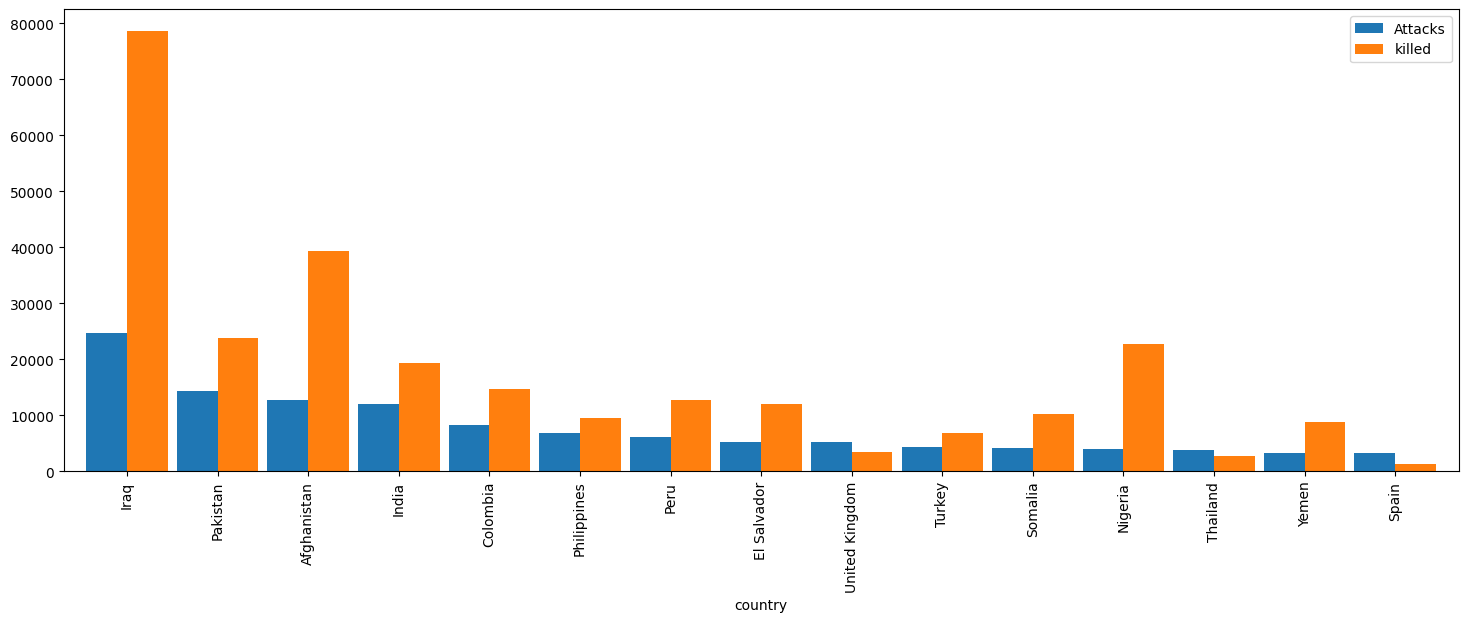

In [32]:
coun_terror=data['country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=data.groupby('country')['killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [33]:
x = data['target_type'].value_counts().index
y = data['target_type'].value_counts().values

go.Figure(go.Scatter(x=x,y=y, mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8)))

In [34]:
data.groupby(['region','target_type']).size().unstack(fill_value = 0)

target_type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,0,7,46,8,1,30,52,4,2,15,...,32,36,28,1,0,1,10,1,4,3
Central America & Caribbean,0,74,1191,205,17,220,1111,272,39,3065,...,584,1501,86,150,35,17,406,84,1227,31
Central Asia,0,5,35,7,2,33,126,21,1,90,...,77,78,8,5,9,2,35,10,9,0
East Asia,0,59,102,14,1,34,128,18,4,40,...,98,97,32,5,5,3,148,5,5,2
Eastern Europe,0,31,434,59,9,136,696,126,0,1136,...,876,862,177,16,18,9,295,128,86,7
Middle East & North Africa,0,277,4158,819,54,800,4256,681,56,9269,...,6893,15257,1263,71,1701,146,1186,2160,812,397
North America,258,57,905,178,8,183,414,121,8,211,...,235,468,170,10,8,12,38,15,104,17
South America,1,146,3494,354,80,390,2849,583,30,1770,...,2256,3152,349,144,78,39,1080,165,1930,28
South Asia,0,174,3123,1781,63,302,5463,438,49,5696,...,8471,10491,1141,303,697,50,2112,2402,799,1106


In [35]:
damaged = data['property'].value_counts().to_frame()
damaged.rename(index = {1:'Yes',0:'No',-9:'Unknown'})

,count
property,
Yes,93533
No,66772
Unknown,21386


In [36]:
x = data['group_name'].value_counts().head(15).index
y = data['group_name'].value_counts().head(15).values

go.Figure(go.Bar(x=x,y=y))

In [37]:
x = data['success'].value_counts().index
y = data['success'].value_counts().values

go.Figure(go.Bar(x = x,y = y))

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [39]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [40]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [41]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [42]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [43]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [44]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [45]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [46]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [47]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [48]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [49]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [50]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [51]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [52]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [53]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***